In [1]:
# Importing Numpy and Panda Library

In [2]:
import pandas as pd
import numpy as np

In [4]:
# It is a 6 class classification problem
# Six class labels activities are mentioned below

ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# function to print the confusion matrix of activities
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

### Data

In [5]:
# UCI data directory 
DATADIR = 'UCI_HAR_Dataset'

In [6]:

# Signals are from Accelerometer sensors and Gyroscope sensors
# Sensors are triaxial
# Therefore,signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [7]:
from google.colab import drive

In [8]:
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# function to load the data
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'/content/drive/MyDrive/HAR/UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).to_numpy()
        ) 

    # Transpose function is used to change the dimensionality of output,
    
    # Resultant shape are (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [10]:

def load_y(subset):
    """
    Our objective is to predict the actvities which lebelled from 1 to 6 , So 1 to 6,
    represents all six human activities respectively. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    So for this task we use dummies variable
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'/content/drive/MyDrive/HAR/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).to_numpy()

In [11]:
def load_data():
    """
    loading the dataset from multiple files,
    which returns X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [14]:
# Importing tensorflow API
np.random.seed(40)
import tensorflow as tf
tf.random.set_seed(40)

In [15]:
# Configuring to the session
import tensorflow as tf
session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [16]:
# Import Keras through tensorflow
from tensorflow.compat.v1.keras import backend as K
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)

In [17]:
# Importing libraries like LSTM layer,Sequential model,dense and dropout layer
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [19]:
# Initializing the parameters
epochs = 40
batch_size = 16
n_hidden = 32

In [20]:
# function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [21]:
# Loading the train data and test data
X_train, X_test, Y_train, Y_test = load_data()

In [22]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


- Defining the Architecture of LSTM model

In [23]:
# Initiliazing the sequential model
model = Sequential()

# Configuring to the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))

# Adding dropout layer to overcome outfitting problem
model.add(Dropout(0.5))

# Adding dense output layer with activation function as Sigmoid
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                5376      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 6)                 198       
                                                                 
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Now Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [47]:
# Training the model as follow
#model.fit(X_train,Y_train,batch_size=batch_size,validation_data=(X_test, Y_test),epochs=epochs)

In [49]:
import keras
from matplotlib import pyplot as plt
history = model.fit(X_train, Y_train,batch_size=batch_size,validation_data=(X_test, Y_test),epochs=epochs)


Epoch 1/40
460/460 [==============================] - 10s 22ms/step - loss: 0.1408 - accuracy: 0.9532 - val_loss: 0.1836 - val_accuracy: 0.9266
Epoch 2/40
460/460 [==============================] - 10s 22ms/step - loss: 0.1515 - accuracy: 0.9529 - val_loss: 0.1640 - val_accuracy: 0.9130
Epoch 3/40
460/460 [==============================] - 10s 22ms/step - loss: 0.1261 - accuracy: 0.9518 - val_loss: 0.1602 - val_accuracy: 0.9103
Epoch 4/40
460/460 [==============================] - 10s 22ms/step - loss: 0.1291 - accuracy: 0.9514 - val_loss: 0.0993 - val_accuracy: 0.9361
Epoch 5/40
460/460 [==============================] - 10s 23ms/step - loss: 0.1245 - accuracy: 0.9535 - val_loss: 0.1156 - val_accuracy: 0.9321
Epoch 6/40
460/460 [==============================] - 10s 22ms/step - loss: 0.1255 - accuracy: 0.9566 - val_loss: 0.1470 - val_accuracy: 0.9321
Epoch 7/40
460/460 [==============================] - 10s 22ms/step - loss: 0.1496 - accuracy: 0.9538 - val_loss: 0.1286 - val_accuracy:

In [50]:
# Confusion Matrix Plotting
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 494        0  ...                   0                43
SITTING                  6      411  ...                   0                17
STANDING                 0       92  ...                   0                 5
WALKING                  0        0  ...                   9                19
WALKING_DOWNSTAIRS       0        0  ...                 415                 4
WALKING_UPSTAIRS         0        1  ...                   1               442

[6 rows x 6 columns]


In [56]:
# printing history of loss
print(history.history['loss'])


[0.1408463716506958, 0.1514972597360611, 0.12605464458465576, 0.12912628054618835, 0.12449231743812561, 0.12545956671237946, 0.14964959025382996, 0.13421569764614105, 0.13792602717876434, 0.12110474705696106, 0.12220092862844467, 0.13417303562164307, 0.13802583515644073, 0.11960551142692566, 0.13151022791862488, 0.11982572823762894, 0.12397557497024536, 0.13246403634548187, 0.12076351791620255, 0.12192162126302719, 0.13362865149974823, 0.1378704160451889, 0.25132307410240173, 0.1314776986837387, 0.1208517849445343, 0.1106567233800888, 0.1743401437997818, 0.1303679496049881, 0.12129189819097519, 0.11466282606124878, 0.1282155066728592, 0.11452572047710419, 0.13173815608024597, 0.12090201675891876, 0.13569846749305725, 0.12705542147159576, 0.1226372942328453, 0.11265794932842255, 0.1633245199918747, 0.16119599342346191]


In [57]:
# printing history of accuracy
print(history.history['accuracy'])

[0.9532099962234497, 0.9529379606246948, 0.9518498182296753, 0.951441764831543, 0.9534820318222046, 0.9566104412078857, 0.9537540674209595, 0.9507616758346558, 0.9544341564178467, 0.9553862810134888, 0.9556583166122437, 0.953618049621582, 0.9545701742172241, 0.9551142454147339, 0.9528019428253174, 0.9549782276153564, 0.9532099962234497, 0.9511697292327881, 0.9533460140228271, 0.954842209815979, 0.9511697292327881, 0.9532099962234497, 0.9423286318778992, 0.9551142454147339, 0.9557943344116211, 0.9562023878097534, 0.9492654800415039, 0.9525299072265625, 0.9522578716278076, 0.9559303522109985, 0.9542981386184692, 0.9552502632141113, 0.9530739784240723, 0.9545701742172241, 0.9537540674209595, 0.9521218538284302, 0.9534820318222046, 0.956066370010376, 0.9533460140228271, 0.9525299072265625]


In [58]:
# printing history of validation loss
print(history.history['val_loss'])

[0.183623269200325, 0.16395094990730286, 0.16023984551429749, 0.09932412952184677, 0.1155998706817627, 0.14703790843486786, 0.1285877525806427, 0.09842649847269058, 0.16507811844348907, 0.16750091314315796, 0.15837179124355316, 0.1920604258775711, 0.12183729559183121, 0.2622870206832886, 0.14086884260177612, 0.11481978744268417, 0.13015861809253693, 0.23873700201511383, 0.1723933070898056, 0.13676171004772186, 0.13324670493602753, 0.13057328760623932, 0.09216928482055664, 0.08443762362003326, 0.12845651805400848, 0.08971630036830902, 0.11267653852701187, 0.10267557203769684, 0.11020059138536453, 0.23333893716335297, 0.2434791475534439, 0.10406099259853363, 0.11789515614509583, 0.117889404296875, 0.1029311865568161, 0.09562376141548157, 0.11243274062871933, 0.09851261973381042, 0.12075850367546082, 0.09103484451770782]


In [59]:
# printing history of validation accuracy
print(history.history['val_accuracy'])

[0.926630437374115, 0.9130434989929199, 0.9103260636329651, 0.936141312122345, 0.9320651888847351, 0.9320651888847351, 0.9442934989929199, 0.9320651888847351, 0.8777173757553101, 0.92798912525177, 0.9225543737411499, 0.9307065010070801, 0.9307065010070801, 0.9307065010070801, 0.938858687877655, 0.9307065010070801, 0.926630437374115, 0.9320651888847351, 0.9320651888847351, 0.936141312122345, 0.914402186870575, 0.9211956262588501, 0.95652174949646, 0.95652174949646, 0.9375, 0.9442934989929199, 0.9307065010070801, 0.9307065010070801, 0.9347826242446899, 0.91576087474823, 0.9334239363670349, 0.936141312122345, 0.9307065010070801, 0.936141312122345, 0.9375, 0.938858687877655, 0.92798912525177, 0.9347826242446899, 0.9524456262588501, 0.936141312122345]


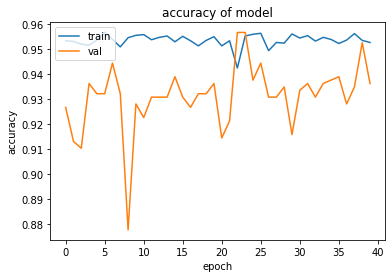

In [60]:
# Plotting the accuracy of model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

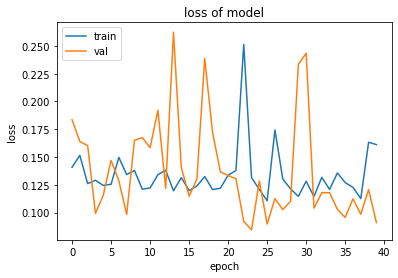

In [61]:
# Plotting the loss of model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss of model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

- With a simple 2 layers of LSTM architecture we got 93.61% accuracy and a loss of 0.0910
- We can further imporve the performace of our LSTM Architecture with Hyperparameter tuning